In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from datetime import datetime
import seaborn as sns

In [4]:
houses = pd.read_csv('/Users/dongchen/Documents/MMAI/2-MBAN_6110/Assignment3_regression model/kc_house_data.csv')

# Data Cleaning

In [5]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
houses[houses['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


33 bedrooms is not reasonable for a 1620 sqft is not a reasonable number we need to drop this outliers.

In [9]:
houses.drop(houses[houses['bedrooms']==33].index, inplace =True)

In [10]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


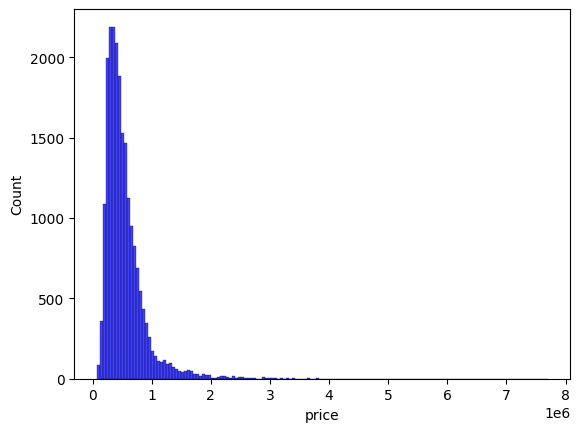

In [11]:
sns.histplot(houses['price'], bins=150, color='blue')
plt.show()

In [12]:
messy_copy = houses.copy()
messy_copy.drop(messy_copy[messy_copy['price']>2.5e+06].index, inplace=True)

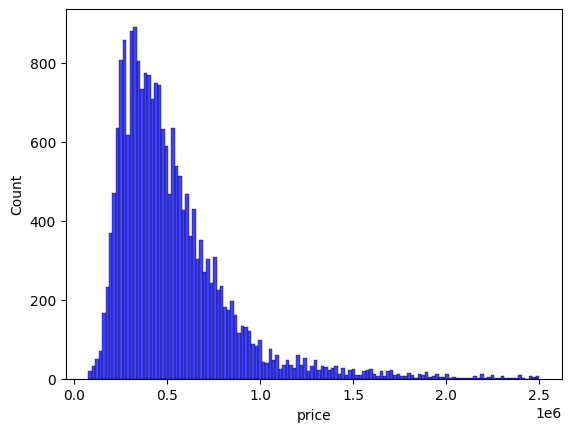

In [13]:
sns.histplot(messy_copy['price'],bins = 130,color ='blue')
plt.show()

Since the regression model we are using today are linear regression model, in order to make the prediction more accurate I think if we could make the price close to normal distriution

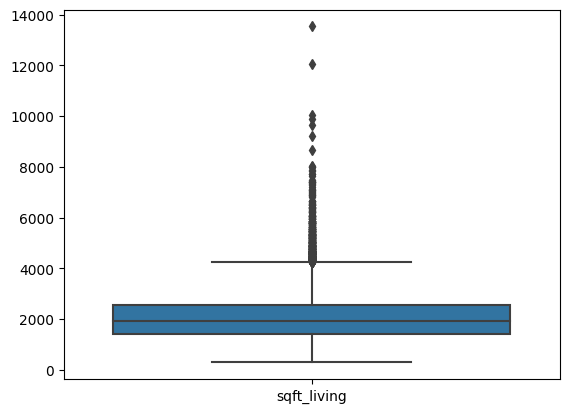

In [14]:
outliers = houses[['sqft_living']]
sns.boxplot(outliers,orient="v")
plt.show()

In [15]:
messy_copy.drop(messy_copy[messy_copy['sqft_living']>11000].index, inplace= True)

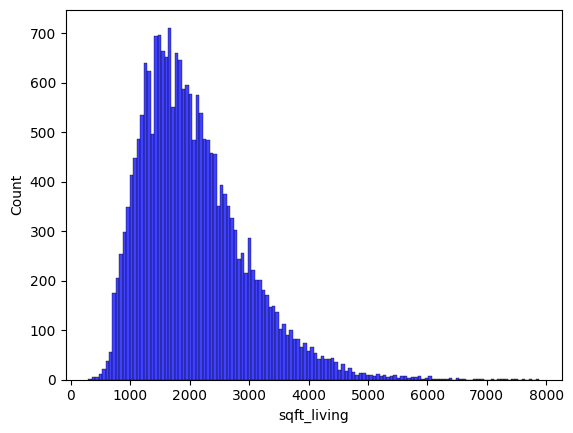

In [16]:
sns.histplot(messy_copy['sqft_living'],bins = 130,color ='blue')
plt.show()

drop the two highest sqft_living to decrease the impact to linear regression model, after drop the outliers it tend to looks like a normal distribution.

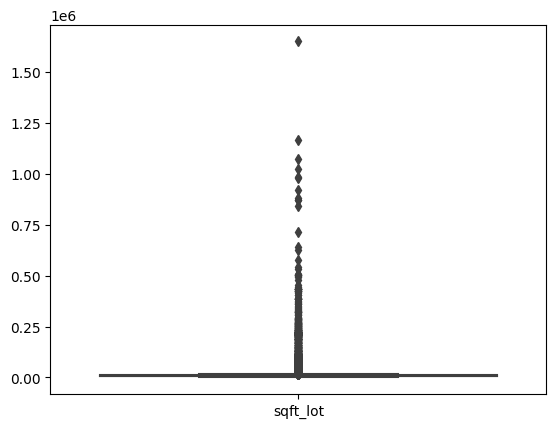

In [17]:
outliers = messy_copy[['sqft_lot']]
sns.boxplot(outliers,orient="v")
plt.show()

In [18]:
messy_copy.drop(messy_copy[messy_copy['sqft_lot']>1.25e+06].index, inplace= True)

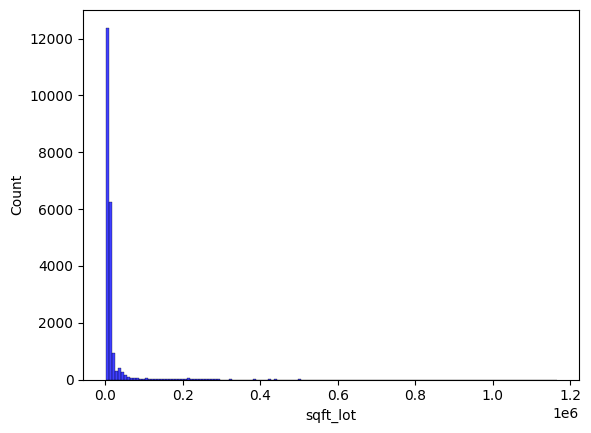

In [19]:
sns.histplot(messy_copy['sqft_lot'],bins = 150,color ='blue')
plt.show()

Take out the sqft_lot outliers

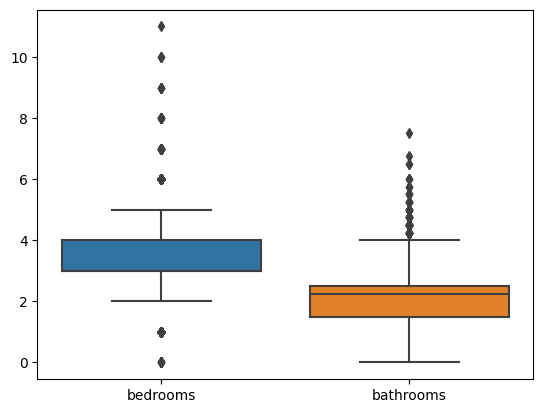

In [20]:
outliers = messy_copy[['bedrooms','bathrooms']]
sns.boxplot(outliers,orient="v")
plt.show()

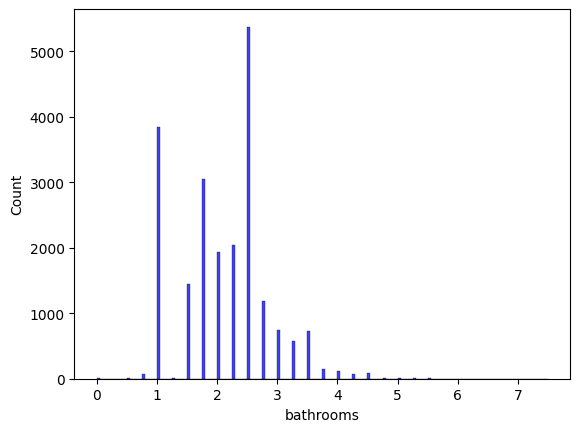

In [21]:
sns.histplot(messy_copy['bathrooms'],bins = 150,color ='blue')
plt.show()

In [22]:
messy_copy[messy_copy['bedrooms']<1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [23]:
d =messy_copy[messy_copy['bathrooms'] > 5]
d

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3100,622069006,20140820T000000,1500000.0,4,5.50,6550,217374,1.0,0,0,...,11,5400,1150,2006,0,98058,47.4302,-122.095,4110,50378
3121,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,...,11,6110,0,2005,0,98059,47.5285,-122.135,4190,10762
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
4035,685000115,20141007T000000,2150000.0,8,6.00,4340,9415,2.0,0,0,...,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100
4598,9297300740,20141118T000000,643500.0,6,5.25,3600,3960,2.0,0,0,...,7,2400,1200,1971,0,98126,47.5656,-122.372,1450,4600
5024,98000950,20141210T000000,1060000.0,4,5.25,4140,14757,2.0,0,2,...,11,4140,0,2005,0,98075,47.5871,-121.969,4440,15523
6501,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,...,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
13907,7851990120,20140701T000000,925000.0,5,5.50,5190,12637,2.0,0,2,...,11,5190,0,2001,0,98065,47.5424,-121.872,3840,12637


In [24]:
d['bathrooms_per_sqft'] = d['bathrooms'] / d['sqft_living'] * 500
outliers_bedrooms_per_sqft = d[d['bathrooms_per_sqft'] > 1]
outliers_bedrooms_per_sqft

/var/folders/6m/hf0hqkzn3tv28lnjyh7tf5qm0000gn/T/ipykernel_8108/418074196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['bathrooms_per_sqft'] = d['bathrooms'] / d['sqft_living'] * 500


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_per_sqft


if it is a really large houses we supose that every 500sqft have 1 bathroom is reasonable and all the outliers satisfied this criteria , so i decided to keep them.

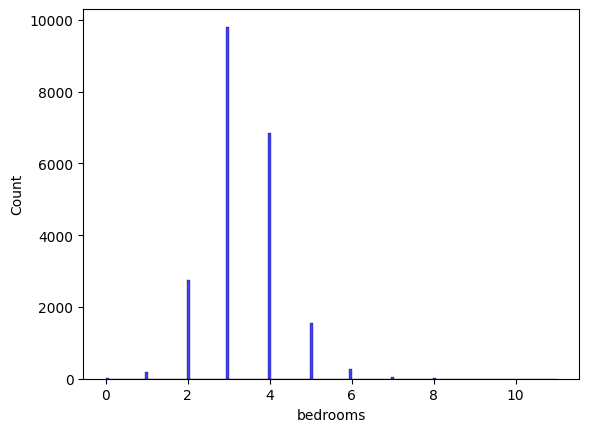

In [25]:
sns.histplot(messy_copy['bedrooms'],bins = 150,color ='blue')
plt.show()

In [26]:
messy_copy[messy_copy['bedrooms'] > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
18443,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [27]:
messy_copy.drop(messy_copy[messy_copy['bedrooms']>8].index, inplace= True)

According to the sqft_living we could decide if the bedrooms number is reasonalbe or not, at there the maximum sqft is 4620 and has 9 bedrooms, unless it is a small hotel this number is not reasonable so i decided to drop them.

In [28]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Right now after clean the outliers we should start to transform some of the columns into dummies to help our model predict the houses price
Date could be an important element that affect the houses prices.
I decide to extract the month and year from the date and creat a quater of the year dummies

In [29]:
#convert the date colunm into datetime
messy_copy['date'] = pd.to_datetime(messy_copy['date'], format='%Y%m%dT%H%M%S')
messy_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [30]:
messy_copy['year'] = messy_copy['date'].dt.year
messy_copy['quarter'] = messy_copy['date'].dt.quarter
messy_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,quarter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,4
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,4
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,4
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1


In [31]:
dummies_quater = pd.get_dummies(messy_copy.quarter, dtype=int)

In [32]:
dummies_quater.rename(columns = {1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}, inplace = True)

In [33]:
messy_copy = pd.concat([messy_copy,dummies_quater],axis=1)
messy_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,year,quarter,Q1,Q2,Q3,Q4
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,2014,4,0,0,0,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,2014,4,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,2015,1,1,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,2014,4,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,2015,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,47.6993,-122.346,1530,1509,2014,2,0,1,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,47.5107,-122.362,1830,7200,2015,1,1,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,47.5944,-122.299,1020,2007,2014,2,0,1,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,47.5345,-122.069,1410,1287,2015,1,1,0,0,0


There are two more columns needs to bed trasform into dummeis, renovated date and basement sqft, deos the house had be renovated or not and have basement or not 
renovated date could turn into renovated or unrenvated
basement sqft could turn into have basement or no basement

In [34]:
dummies_renovate = pd.get_dummies(messy_copy.yr_renovated,dtype= int)
dummies_renovate

,0,1934,1940,1944,1945,1946,1948,1950,1951,1953,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21610,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Create a new column 'is_renovated', it will be 1 if 'renovate_year' is not NaN and not 0, and 0 otherwise
messy_copy['is_renovated'] = messy_copy['yr_renovated'].apply(lambda x: 1 if not pd.isnull(x) and x != 0 else 0)

In [36]:
#create new column 'have_basement', it will be True if 'have_basement' is not NaN and not 0, and 0 otherwise
messy_copy['have_basement'] = messy_copy['sqft_basement'].apply(lambda x: 1 if not pd.isnull(x) and x != 0 else 0)

In [37]:
messy_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,year,quarter,Q1,Q2,Q3,Q4,is_renovated,have_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,2014,4,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,2014,4,0,0,0,1,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,2015,1,1,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,2014,4,0,0,0,1,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,2015,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,1509,2014,2,0,1,0,0,0,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1830,7200,2015,1,1,0,0,0,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,2007,2014,2,0,1,0,0,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1410,1287,2015,1,1,0,0,0,0,0


# OLS Regression

In [38]:
#drop have_basement
results = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot  + waterfront+ Q1 + Q2 + Q3 + Q4+is_renovated  + lat+ long +condition +grade ", data=messy_copy).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     3342.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:39:19   Log-Likelihood:            -2.9059e+05
No. Observations:               21503   AIC:                         5.812e+05
Df Residuals:                   21489   BIC:                         5.813e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.361e+07   9.31e+05    -46.863   

All the variable that put in the ols model are significant to the linear regression model. The R-square is relatively high

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

In [39]:
pred_vals = results.predict(messy_copy[['bathrooms','bedrooms','sqft_living','sqft_lot','waterfront','Q1','Q2','Q3','Q4','is_renovated','lat','long','condition','grade']])

In [40]:
pred_vals

0        267534.361158
1        765555.502101
2        286345.558052
3        512075.067849
4        488637.746437
             ...      
21608    566289.898618
21609    565824.490705
21610    344038.373649
21611    425881.718353
21612    324709.236883
Length: 21503, dtype: float64

In [41]:
res = pd.concat([pred_vals.to_frame().rename(columns = {0:'pred'}),messy_copy['price']], axis =1)
res


,pred,price
0,267534.361158,221900.0
1,765555.502101,538000.0
2,286345.558052,180000.0
3,512075.067849,604000.0
4,488637.746437,510000.0
...,...,...
21608,566289.898618,360000.0
21609,565824.490705,400000.0
21610,344038.373649,402101.0
21611,425881.718353,400000.0


In [42]:
res['error'] = res['pred']- res['price']
res

,pred,price,error
0,267534.361158,221900.0,45634.361158
1,765555.502101,538000.0,227555.502101
2,286345.558052,180000.0,106345.558052
3,512075.067849,604000.0,-91924.932151
4,488637.746437,510000.0,-21362.253563
...,...,...,...
21608,566289.898618,360000.0,206289.898618
21609,565824.490705,400000.0,165824.490705
21610,344038.373649,402101.0,-58062.626351
21611,425881.718353,400000.0,25881.718353


In [43]:
res['sq_error'] = res['error']**2
res

,pred,price,error,sq_error
0,267534.361158,221900.0,45634.361158,2.082495e+09
1,765555.502101,538000.0,227555.502101,5.178151e+10
2,286345.558052,180000.0,106345.558052,1.130938e+10
3,512075.067849,604000.0,-91924.932151,8.450193e+09
4,488637.746437,510000.0,-21362.253563,4.563459e+08
...,...,...,...,...
21608,566289.898618,360000.0,206289.898618,4.255552e+10
21609,565824.490705,400000.0,165824.490705,2.749776e+10
21610,344038.373649,402101.0,-58062.626351,3.371269e+09
21611,425881.718353,400000.0,25881.718353,6.698633e+08


In [44]:
np.sqrt(res['sq_error'].mean())

178967.38451265066

<Axes: xlabel='error', ylabel='Count'>

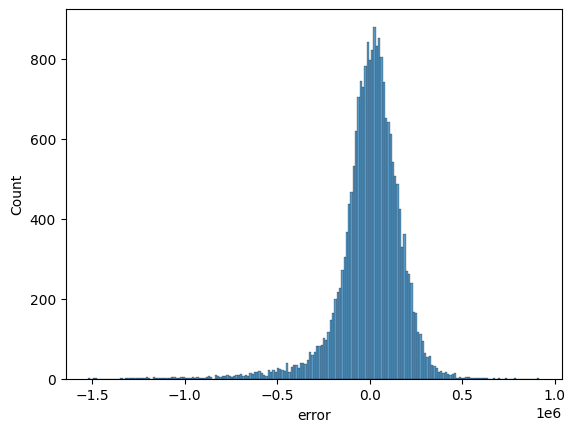

In [45]:
#这是在干嘛
sns.histplot(res['error'])

<Axes: xlabel='price', ylabel='Count'>

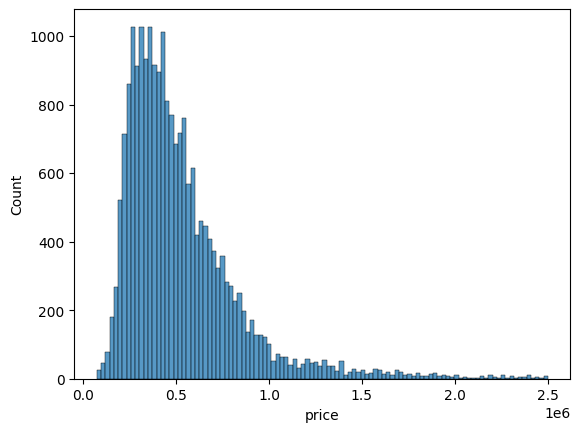

In [46]:
#这是在干嘛
sns.histplot(messy_copy['price'])

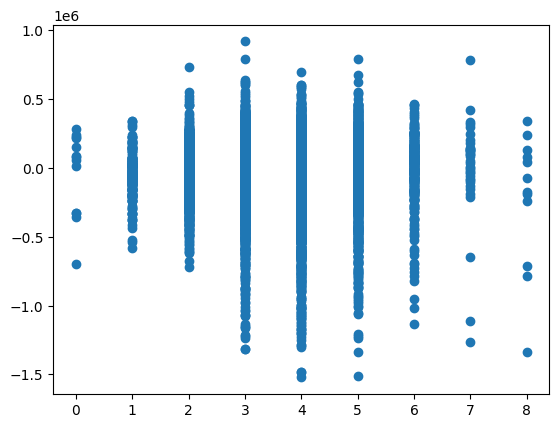

In [47]:
#这是在干嘛
plt.scatter(messy_copy['bedrooms'],res['error'])

((array([-3.99582711, -3.78054229, -3.66277689, ...,  3.66277689,
          3.78054229,  3.99582711]),
  array([-1521660.05001335, -1513707.19911973, -1485263.42859155, ...,
           789287.27384327,   789596.6193753 ,   915174.78313155])),
 (168063.99878790462, -6.799623884759933e-08, 0.9389081935891732))

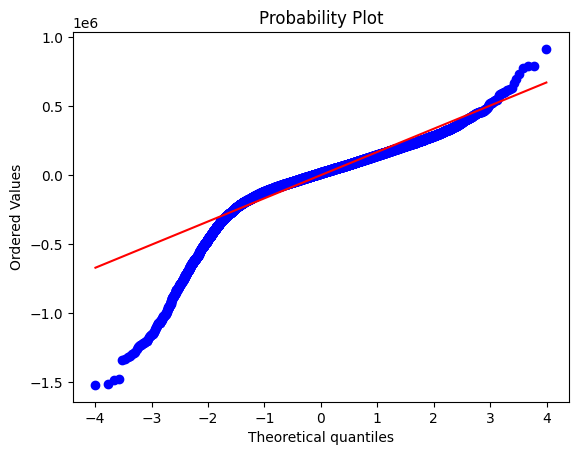

In [48]:
#代表什么

import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [49]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_bathrooms  dfb_sqft_living   
0          -0.000153     -0.000981       0.002297         0.000522  \
1           0.006091      0.009370      -0.000699        -0.013913   
2           0.000646      0.002973       0.001251        -0.000435   
3          -0.003829      0.000903       0.008115        -0.003033   
4           0.000937     -0.000008      -0.000020        -0.000699   
...              ...           ...            ...              ...   
21608       0.008849      0.000513      -0.010052         0.010766   
21609       0.006964     -0.003795      -0.002101         0.001215   
21610      -0.000611     -0.001412      -0.003132         0.000428   
21611      -0.001074      0.000171      -0.001055         0.001361   
21612      -0.000003     -0.000007      -0.000015         0.000002   

       dfb_sqft_lot  dfb_waterfront    dfb_Q1    dfb_Q2    dfb_Q3    dfb_Q4   
0          0.000179    2.187525e-05 -0.000142 -0.000143 -0.000144 -0.000184  \
1

In [50]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_bathrooms,dfb_sqft_living,dfb_sqft_lot,dfb_waterfront,dfb_Q1,dfb_Q2,dfb_Q3,dfb_Q4,...,dfb_lat,dfb_long,dfb_condition,dfb_grade,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000153,-0.000981,0.002297,0.000522,0.000179,2.187525e-05,-0.000142,-0.000143,-0.000144,-0.000184,...,0.000691,0.000110,0.001394,-0.001035,1.629671e-06,-0.254952,0.000376,-0.004944,-0.254946,-0.004944
1,0.006091,0.009370,-0.000699,-0.013913,0.002396,4.939075e-03,0.006135,0.006143,0.006146,0.005938,...,-0.008924,0.003016,0.004186,0.013940,1.634582e-04,-1.272040,0.001513,-0.049516,-1.272058,-0.049517
2,0.000646,0.002973,0.001251,-0.000435,-0.000319,-2.016242e-04,0.000562,0.000673,0.000673,0.000674,...,-0.006027,-0.001530,0.002849,0.003093,1.229364e-05,-0.594179,0.000522,-0.013580,-0.594170,-0.013579
3,-0.003829,0.000903,0.008115,-0.003033,0.000509,-5.186859e-04,-0.003848,-0.003850,-0.003853,-0.003766,...,-0.000896,-0.004193,0.008509,-0.002381,1.457771e-05,0.513686,0.000828,0.014787,0.513677,0.014787
4,0.000937,-0.000008,-0.000020,-0.000699,-0.000254,4.619458e-05,0.000954,0.000931,0.000932,0.000932,...,0.000461,0.001130,-0.000255,0.000653,3.854788e-07,0.119349,0.000406,0.002405,0.119347,0.002405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.008849,0.000513,-0.010052,0.010766,-0.000893,2.916389e-04,0.008881,0.008752,0.008881,0.008880,...,-0.006421,0.006581,0.003692,-0.005122,3.382225e-05,-1.152512,0.000382,-0.022524,-1.152521,-0.022524
21609,0.006964,-0.003795,-0.002101,0.001215,-0.000108,6.466653e-04,0.006835,0.007007,0.007006,0.007007,...,0.003051,0.008241,0.004163,-0.001055,2.172185e-05,-0.926437,0.000379,-0.018051,-0.926434,-0.018051
21610,-0.000611,-0.001412,-0.003132,0.000428,-0.000457,-1.424075e-04,-0.000621,-0.000583,-0.000619,-0.000620,...,0.000161,-0.000580,-0.001703,0.001167,2.723879e-06,0.324389,0.000388,0.006392,0.324382,0.006392
21611,-0.001074,0.000171,-0.001055,0.001361,0.000372,-3.175782e-05,-0.001094,-0.001067,-0.001067,-0.001067,...,0.000032,-0.001085,0.000212,-0.000719,6.191436e-07,-0.144602,0.000444,-0.003047,-0.144599,-0.003047


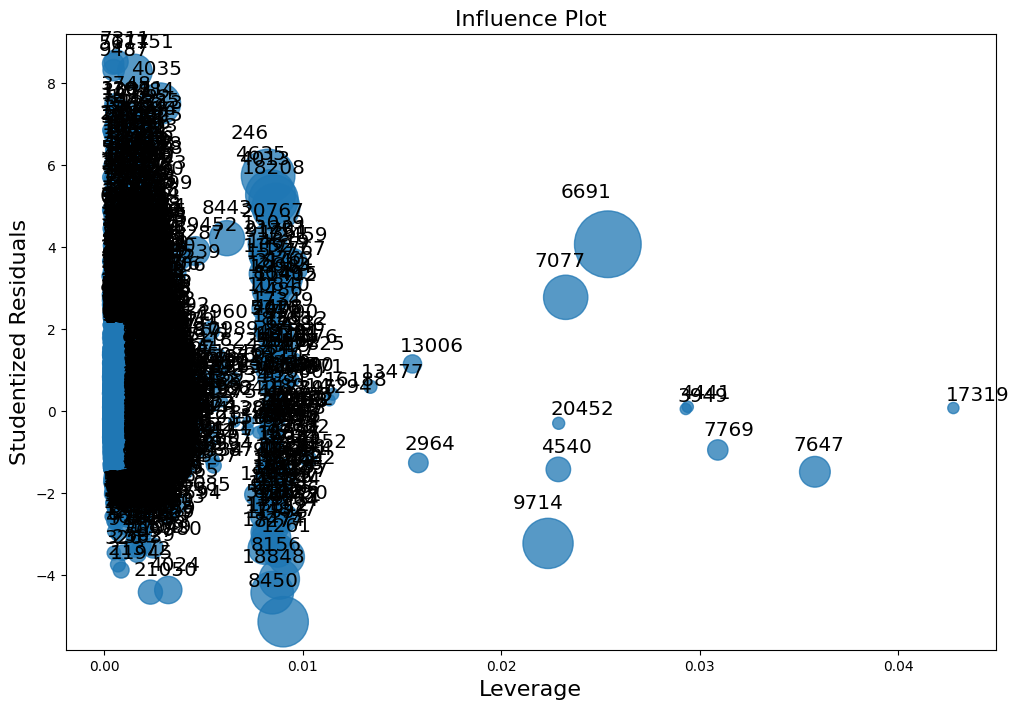

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [52]:
messy_copy.drop(index=[17319,7647,7769,6691,7077,20452,4540,9714,20452],inplace = True)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

# Test other linear regression model, Lasso, Rigde, ElasticNet

In [54]:
messy_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,year,quarter,Q1,Q2,Q3,Q4,is_renovated,have_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,2014,4,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,2014,4,0,0,0,1,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,2015,1,1,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,2014,4,0,0,0,1,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,2015,1,1,0,0,0,0,0


In [55]:
# separate features and target
#categorical_features = ['Q1','Q2','Q3','Q4']
numerical_features = ['bathrooms','bedrooms','sqft_living','sqft_lot','waterfront','is_renovated','lat','long','condition','grade','Q1','Q2','Q3','Q4']
target = 'price'

In [56]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(messy_copy[numerical_features]
                                                    ,messy_copy[target],
                                                    test_size = 0.3, random_state=1234)

In [57]:
y_train

6522      527000.0
10929     360000.0
16273     185000.0
16299    1057000.0
18880     239000.0
           ...    
8271      292000.0
9503      435000.0
8520      553000.0
17137    1776000.0
1323      267500.0
Name: price, Length: 15046, dtype: float64

In [58]:
# define transformers
#cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [59]:
# building processor
preprocessor = ColumnTransformer(transformers =  [('num', num_transformer, numerical_features)])

# Linear Regression

In [60]:
#test linear regression model
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [61]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'waterfront', 'is_renovated',
                                                   'lat', 'long', 'condition',
                                                   'grade', 'Q1', 'Q2', 'Q3',
                                                   'Q4'])])),
                ('regressor', LinearRegression())])

In [62]:
pred = linear_regression.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
np.sqrt(mean_squared_error(pred,y_test))

180008.868351802

# Ridge Regression

In [65]:
#ridge
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [66]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'waterfront', 'is_renovated',
                                                   'lat', 'long', 'condition',
                                                   'grade', 'Q1', 'Q2', 'Q3',
                                                   'Q4'])])),
                ('regressor', Ridge(alpha=3.0))])

In [67]:
pred_ridge = ridge_regression.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

180014.65936473958

In [2]:
# Step 6: Obtain the coefficient values
coefficients = ridge_regression.coef_

# Print the coefficient values
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef}")

NameError: name 'ridge_regression' is not defined

# Lasso Regression

In [69]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [70]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'waterfront', 'is_renovated',
                                                   'lat', 'long', 'condition',
                                                   'grade', 'Q1', 'Q2', 'Q3',
                                                   'Q4'])])),
                ('regressor', Lasso())])

In [71]:
lasso_pred = lasso_regression.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

180015.39878832694

# Eleasticnet Regression

In [73]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [74]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'waterfront', 'is_renovated',
                                                   'lat', 'long', 'condition',
                                                   'grade', 'Q1', 'Q2', 'Q3',
                                                   'Q4'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [75]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

183508.21742208145